In [1]:
# import packages

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import folium


from scipy import stats
from scipy.stats import norm
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from statsmodels.formula.api import ols
from sklearn.metrics import mean_squared_error as MSE


In [2]:
# Import dataset
data = pd.read_csv("data/kc_house_data.csv")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
data.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
id,1.000000,-0.034184,-0.006306,-0.012094,-0.027932,-0.119101,0.032043,-0.023216,-0.014662,-0.007829,-0.041625,0.023071,-0.029131,-0.000691,0.000479
price,-0.034184,1.000000,0.289204,0.480401,0.608521,0.085730,0.180576,0.538651,0.245058,0.264169,0.313409,0.096013,0.084786,0.063632,-0.022509
bedrooms,-0.006306,0.289204,1.000000,0.589273,0.637874,0.003306,0.147592,0.547164,0.238502,0.319441,0.183439,0.146191,0.014286,0.108758,-0.106689
bathrooms,-0.012094,0.480401,0.589273,1.000000,0.772677,0.035886,0.404412,0.674924,0.260902,0.457022,0.327551,0.443648,0.040631,-0.005225,0.017400
sqft_living,-0.027932,0.608521,0.637874,0.772677,1.000000,0.119563,0.304240,0.883984,0.338460,0.511740,0.396030,0.291694,0.038499,0.102186,-0.087669
sqft_lot,-0.119101,0.085730,0.003306,0.035886,0.119563,1.000000,-0.032097,0.129231,0.004111,0.087169,0.155250,0.001750,0.010049,0.030020,-0.034308
floors,0.032043,0.180576,0.147592,0.404412,0.304240,-0.032097,1.000000,0.448281,-0.248093,0.132656,0.125183,0.544646,-0.025449,-0.218554,0.233781
sqft_above,-0.023216,0.538651,0.547164,0.674924,0.883984,0.129231,0.448281,1.000000,-0.066801,0.560551,0.312117,0.387448,0.010598,0.092258,-0.082744
sqft_basement,-0.014662,0.245058,0.238502,0.260902,0.338460,0.004111,-0.248093,-0.066801,1.000000,0.026361,0.210500,-0.230226,0.053634,0.059788,-0.045208
sqft_garage,-0.007829,0.264169,0.319441,0.457022,0.511740,0.087169,0.132656,0.560551,0.026361,1.000000,0.216354,0.447560,-0.098603,0.092346,-0.096861


# Initial Look at Data to Get Information

In [5]:
data['sqft_above'].value_counts()

1200    282
1300    282
1060    271
1100    268
1250    265
       ... 
1799      1
1783      1
1767      1
7700      1
2049      1
Name: sqft_above, Length: 1187, dtype: int64

In [6]:
data['heat_source'].value_counts()

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [7]:
data['sewer_system'].value_counts()

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

In [8]:
data['sewer_system'].isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
30150    False
30151    False
30152    False
30153    False
30154    False
Name: sewer_system, Length: 30155, dtype: bool

# One duplicate in ID, a few nulls in 'Sewer_system' and 'heat_source', could drop these since there are only a few

### Dropping the duplicated ID

In [9]:
#Check for duplicates
data[data.duplicated(subset=['id'])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


In [10]:
#Verify that duplicate is actually a duplicate
data[data['id'].isin(['1233100736'])]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4845,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135
4846,1233100736,9/28/2021,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


In [11]:
#Dropping duplicate row
data_clean = data.drop_duplicates(subset = ['id'])
data_clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


### Removing the nulls from 'sewer_System' and 'heat_source'

In [12]:
#Drop columns with missing data
data_clean = data_clean.dropna(subset=['sewer_system', 'heat_source'])
data_clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


We have elected to drop the rows with missing data instead of imputing it because there are only 3 rows with missing values. 

# Separating Out Zipcode from the Address

In [13]:
data_clean['address']

0        2102 Southeast 21st Court, Renton, Washington ...
1        11231 Greenwood Avenue North, Seattle, Washing...
2        8504 South 113th Street, Seattle, Washington 9...
3        4079 Letitia Avenue South, Seattle, Washington...
4        2193 Northwest Talus Drive, Issaquah, Washingt...
                               ...                        
30150    4673 Eastern Avenue North, Seattle, Washington...
30151    4131 44th Avenue Southwest, Seattle, Washingto...
30152    910 Martin Luther King Jr Way, Seattle, Washin...
30153    17127 114th Avenue Southeast, Renton, Washingt...
30154    18615 7th Avenue South, Burien, Washington 981...
Name: address, Length: 30110, dtype: object

In [14]:
# This creates a new column with our zipcodes of the houses
data_clean['postal_code'] = data_clean['address'].str[-20:-15]
data_clean

<ipython-input-14-ad923d199017>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['postal_code'] = data_clean['address'].str[-20:-15]


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055


In [15]:
#verify no missing values -- sanity check 
data_clean.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
postal_code      0
dtype: int64

### Any homes not within King County?

In [16]:
data_clean['postal_code'].value_counts(normalize=True)

98042    0.032946
98038    0.028462
98103    0.025274
98115    0.025241
98117    0.024842
           ...   
15010    0.000033
99501    0.000033
56027    0.000033
50644    0.000033
85296    0.000033
Name: postal_code, Length: 399, dtype: float64

It appears that addresses within King's County begin with Postal Code '98'. Are there any that don't being with '98'? Let's find out. 

In [17]:
#find any postal codes not within King County
prefixes = ['98']

data_clean[~data_clean.postal_code.str.startswith(tuple(prefixes))]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code
12,1797501124,6/25/2021,750000.0,3,2.0,1280,964,3.0,NO,NO,...,1280,0,0,380,2021,0,"5712 A Street, Omaha, Nebraska 68106, United S...",41.225811,-96.001397,68106
53,7548300606,5/3/2022,960000.0,3,2.0,1280,1221,2.0,NO,NO,...,980,300,0,400,2019,0,"1820 South State Street, Vineland, New Jersey ...",39.460807,-75.015361,08360
62,1934800106,8/24/2021,740000.0,2,2.0,1120,734,3.0,NO,NO,...,1120,0,0,260,2021,0,"1804 Spruce Street, McLeansboro, Illinois 6285...",38.075870,-88.535760,62859
159,856000595,7/8/2021,3730000.0,4,4.5,4820,10800,2.0,NO,NO,...,4820,0,850,0,2006,0,"626 13th Street, Union City, New Jersey 07087,...",40.761325,-74.039020,07087
172,1336300219,2/9/2022,759900.0,2,2.0,960,591,3.0,NO,NO,...,960,0,0,240,2021,0,"11th Avenue, West Babylon, New York 11704, Uni...",40.719455,-73.371935,11704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30029,1978200468,10/28/2021,1480000.0,3,2.0,2050,1090,3.5,NO,NO,...,1920,490,360,240,2021,0,"Avenue Cuts, 34 Ridge Rd, North Arlington, New...",40.782453,-74.137642,07031
30044,9834201391,2/17/2022,520000.0,2,2.0,790,597,2.0,NO,NO,...,520,270,0,210,2021,0,"36th Avenue, Kenosha, Wisconsin 53142, United ...",42.548430,-87.851900,53142
30116,2768100152,1/1/2022,710000.0,1,2.0,1180,616,3.0,NO,NO,...,840,340,0,330,2021,0,"57th Street Lane NW, Rochester, Minnesota 5590...",44.081760,-92.524610,55901
30129,8584800130,11/18/2021,940000.0,2,2.0,1550,1026,2.5,NO,NO,...,1310,470,230,0,2009,0,"214 B, Mount Laurel, New Jersey 08054, United ...",39.955820,-74.881130,08054


There are 911 rows that are not within the King's County area whose postal code does not being with '98'. Let's drop these homes from our dataset and focus on those solely within the county.

In [18]:
#find the indexes of the homes not within King County
prefixes = ['98']
non_king_postals = data_clean[~data_clean.postal_code.str.startswith(tuple(prefixes))].index
non_king_postals

#drop the rows whose postal code does not being with '98'
only_king = data_clean.drop(non_king_postals)
only_king.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027


There might still be some zipcodes present within the dataset that are not within King's County, but are in a neighboring county whose postal code also begins with '98', but let's hone our data some more. 

## Creating new columns from existing data

### Numeric grade value column

In [19]:
only_king['grade'].unique()

array(['7 Average', '9 Better', '8 Good', '6 Low Average', '10 Very Good',
       '5 Fair', '11 Excellent', '12 Luxury', '4 Low', '13 Mansion',
       '3 Poor', '2 Substandard'], dtype=object)

In [20]:
#To get numeric grade code value
only_king['grade_code'] = only_king['grade'].str[0:2]

#To strip whitespace from the grade code
only_king['grade_code'] = only_king['grade_code'].str.strip()

In [21]:
#sanity check to make sure no white space
only_king['grade_code'].unique()

array(['7', '9', '8', '6', '10', '5', '11', '12', '4', '13', '3', '2'],
      dtype=object)

### Numeric condition value column

In [22]:
#To get numeric condition code
only_king['condition_code'] = only_king['condition']

# Replace the word to numeric value
only_king.condition_code.replace({'Poor': 1, 'Fair': 2, 'Average': 3, 'Good': 4,'Very Good': 5}, inplace=True)

### Converting Data Types of New Columns

In [23]:
#change postal code to numeric datatype
only_king['postal_code'] = only_king['postal_code'].astype(int)

#To convert to float
only_king['condition_code'] = only_king['condition_code'].astype(int)

#To convert to float
only_king['grade_code'] = only_king['grade_code'].astype(int)

## Feature engineering, want to know the price per sqft of livable sqft

In [24]:
only_king['price_sqft'] = only_king['price'] / only_king['sqft_living']
only_king

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code,grade_code,condition_code,price_sqft
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,7,4,572.033898
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133,7,3,332.129964
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178,7,3,107.986111
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118,9,3,358.796296
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027,7,3,529.017857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103,8,4,814.136126
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116,7,3,650.000000
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122,7,3,493.827160
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055,8,3,301.556420


In [25]:
only_king['price_sqft'].describe()

count     29199.000000
mean        558.055358
std        3541.243279
min           6.920415
25%         357.754755
50%         487.654321
75%         641.876179
max      601000.000000
Name: price_sqft, dtype: float64

## Cleaning price to rid of outliers
- We utilize the Interqurtile range to rid outliers via the formula
- Below: Q1 - 1.5 IQR
- Above: Q3 + 1.5 IQR
- IQR = Q3 – Q1

In [26]:
only_king['price'].describe()

count    2.919900e+04
mean     1.112959e+06
std      8.954250e+05
min      2.736000e+04
25%      6.450000e+05
50%      8.680000e+05
75%      1.310000e+06
max      3.075000e+07
Name: price, dtype: float64

In [27]:
#Calculate Q1, Q2, Q3 and IQR
Q1 = np.percentile(only_king['price'], 25, interpolation = 'midpoint') 
Q2 = np.percentile(only_king['price'], 50, interpolation = 'midpoint') 
Q3 = np.percentile(only_king['price'], 75, interpolation = 'midpoint') 

print('Q1 25 percentile of the given data is, ', Q1)
print('Q2 50 percentile of the given data is, ', Q2)
print('Q3 75 percentile of the given data is, ', Q3)
  
IQR = Q3 - Q1 
print('Interquartile range (IQR) is', IQR)

Q1 25 percentile of the given data is,  645000.0
Q2 50 percentile of the given data is,  868000.0
Q3 75 percentile of the given data is,  1310000.0
Interquartile range (IQR) is 665000.0


In [28]:
#Find the lower and upper limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('Lower limit is', lower_limit)
print('Upper limit is', upper_limit)

Lower limit is -352500.0
Upper limit is 2307500.0


In [29]:
#Locate the homes greater than the upper limit
only_king[only_king['price'] >= 2307500]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code,grade_code,condition_code,price_sqft
27,5424700190,2/26/2022,4500000.0,4,3.0,2760,13150,1.5,NO,NO,...,160,1954,0,"8637 Northeast 6th Street, Medina, Washington ...",47.615710,-122.223990,98039,9,4,1630.434783
36,1925059107,6/29/2021,2450000.0,4,3.5,2300,8370,2.0,NO,NO,...,110,1950,1995,"9411 Northeast 32nd Street, Clyde Hill, Washin...",47.639005,-122.214107,98004,9,3,1065.217391
43,1726059053,3/22/2022,3850000.0,5,3.5,4180,209959,1.0,NO,NO,...,0,2016,0,"10919 Northeast 164th Lane, Bothell, Washingto...",47.745460,-122.194980,98011,8,3,921.052632
84,6865200085,3/7/2022,2500000.0,4,3.5,3120,3801,2.0,NO,NO,...,380,2021,0,"1305 North 50th Street, Seattle, Washington 98...",47.664785,-122.341635,98103,8,3,801.282051
118,5425700191,12/15/2021,3000000.0,3,1.5,2040,14284,1.0,NO,NO,...,0,1952,0,"2539 82nd Avenue Northeast, Medina, Washington...",47.633020,-122.232570,98039,7,4,1470.588235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30100,3582050010,4/21/2022,2588000.0,5,4.5,3580,5719,2.0,NO,NO,...,220,2019,0,"21802 Southeast 5th Place, Sammamish, Washingt...",47.604675,-122.048760,98074,9,3,722.905028
30106,7588700215,4/11/2022,2875000.0,3,2.0,1900,8800,1.0,NO,NO,...,80,1953,0,"8322 16th Avenue Northwest, Seattle, Washingto...",47.689410,-122.377560,98117,8,3,1513.157895
30126,1087500050,11/30/2021,3754500.0,4,5.5,5200,10790,2.0,NO,NO,...,400,2021,0,"12237 Northeast 66th Street, Kirkland, Washing...",47.664625,-122.175870,98033,10,3,722.019231
30130,5456000475,3/9/2022,2435000.0,5,3.0,3920,8414,1.0,NO,NO,...,350,1954,0,"9823 Mercerwood Drive, Mercer Island, Washingt...",47.573195,-122.207510,98040,9,4,621.173469


There are 1874 rows of data that have housing pricing greater than $2,307,500.

In [30]:
#Create a copy dataset
df_clean = only_king.copy()

#Filter out the homes beyond the upper limit of price
df_clean = df_clean[df_clean['price'] <= 2307500]
df_clean

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code,grade_code,condition_code,price_sqft
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,7,4,572.033898
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133,7,3,332.129964
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178,7,3,107.986111
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118,9,3,358.796296
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027,7,3,529.017857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103,8,4,814.136126
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116,7,3,650.000000
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122,7,3,493.827160
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055,8,3,301.556420


In [31]:
#Wanted to see where price/sqft was equal to 601k
df_clean.loc[df_clean['price_sqft'] == 601000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code,grade_code,condition_code,price_sqft
14977,1549500215,12/17/2021,1803000.0,4,4.0,3,326701,2.0,NO,NO,...,0,2021,0,"31072 Northeast 165th Street, Duvall, Washingt...",47.74529,-121.92362,98019,9,3,601000.0


### Since this is for a family, we want at least 2 bedrooms and at least 1 bathroom in the house, only one foor and houses built after 1977 due to the asbestos ban.

In [32]:
#Find the homes with at least 2 bedrooms and at least one bathroom
df_clean[(df_clean['bedrooms'] >= 2) & (df_clean['bathrooms'] >= 1)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code,grade_code,condition_code,price_sqft
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,7,4,572.033898
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591,98133,7,3,332.129964
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520,98178,7,3,107.986111
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020,98118,9,3,358.796296
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188,98027,7,3,529.017857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940,98103,8,4,814.136126
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851,98116,7,3,650.000000
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585,98122,7,3,493.827160
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908,98055,8,3,301.556420


In [33]:
#Filter out homes with less than 2 bedrooms 
df_clean = df_clean[df_clean['bedrooms'] >= 2]

Filtered to home with at least two rooms to ensure that the house is suiteable for a single family home, one room for the parents and one room for the children.

In [34]:
#Filter out the homes with less than 1 bathroom
df_clean = df_clean[df_clean['bathrooms'] >=1]

Filtered to homes with atleast one full bath. A place to both shower and use the toilet is important! 

In [35]:
#Filter to homes with only 1 floor
df_clean = df_clean[df_clean['floors'] == 1]

Filtered to homes with only 1 floor to focus on the safety of children. Stairs can be scary!

In [36]:
#Filter out homes built after 1977
df_clean = df_clean[df_clean['yr_built'] > 1977]

The use of asbestos was banned in 1977. We have filtered the dataset to homes built after 1977 to ensure the house does not contain any asbestos.

In [37]:
#Filter to homes that meet building codes - Grade 6 or higher
df_clean = df_clean[df_clean['grade_code'] >= 6]

Building grade of 6 is the lowest grade that meets building codes. We want to make sure the house is of code and can surpass inspection.

In [38]:
df_clean['condition_code'].unique()

array([4, 3, 5, 2])

In [39]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2737 entries, 21 to 30152
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              2737 non-null   int64  
 1   date            2737 non-null   object 
 2   price           2737 non-null   float64
 3   bedrooms        2737 non-null   int64  
 4   bathrooms       2737 non-null   float64
 5   sqft_living     2737 non-null   int64  
 6   sqft_lot        2737 non-null   int64  
 7   floors          2737 non-null   float64
 8   waterfront      2737 non-null   object 
 9   greenbelt       2737 non-null   object 
 10  nuisance        2737 non-null   object 
 11  view            2737 non-null   object 
 12  condition       2737 non-null   object 
 13  grade           2737 non-null   object 
 14  heat_source     2737 non-null   object 
 15  sewer_system    2737 non-null   object 
 16  sqft_above      2737 non-null   int64  
 17  sqft_basement   2737 non-null  

In [40]:
df_clean['price'].describe()

count    2.737000e+03
mean     8.422258e+05
std      3.868158e+05
min      4.118100e+04
25%      5.700000e+05
50%      7.300000e+05
75%      1.010100e+06
max      2.301000e+06
Name: price, dtype: float64

In [41]:
df_clean['yr_built'].describe()

count    2737.000000
mean     1987.678115
std         9.910997
min      1978.000000
25%      1980.000000
50%      1985.000000
75%      1992.000000
max      2022.000000
Name: yr_built, dtype: float64

In [42]:
df_clean.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_patio,yr_built,yr_renovated,address,lat,long,postal_code,grade_code,condition_code,price_sqft
21,2310000170,2/28/2022,750000.0,3,2.0,1590,7754,1.0,NO,YES,...,0,1990,0,"27307 226th Avenue Southeast, Maple Valley, Wa...",47.357065,-122.04067,98038,7,4,471.698113
25,2095600170,10/8/2021,580000.0,3,3.0,2020,4482,1.0,NO,NO,...,120,1992,0,"22609 102nd Place Southeast, Kent, Washington ...",47.399470,-122.20413,98031,7,3,287.128713
26,8682282030,5/4/2022,2000000.0,3,3.0,2700,7694,1.0,NO,NO,...,640,2006,0,"23837 NE Adair Rd, Redmond, Washington 98053, ...",47.708760,-122.02073,98053,9,3,740.740741
34,5727500011,11/3/2021,785000.0,3,2.0,1350,7354,1.0,NO,NO,...,120,1985,0,"16710 Meridian Avenue North, Shoreline, Washin...",47.751020,-122.33447,98133,7,5,581.481481
39,1421059003,8/25/2021,1680000.0,3,2.5,5200,206039,1.0,NO,NO,...,670,2007,0,"15916 Southeast 326th Street, Auburn, Washingt...",47.310595,-122.12938,98092,10,3,323.076923


### Export this cleaned dataset as a .csv, this will be our "master dataset"

In [43]:
df_clean.to_csv('data_cleaned.csv')

In [44]:
new_df = df_clean.copy()

In [45]:
Seattle_postalcodes = [98133, 98125, 98115, 98117, 98107, 98103, 98105, 98199, 98119, 98109, 98102, 98112, 98185, 98145,
98195, 98191, 98181, 98154, 98164, 98121, 98101, 98104, 98122, 98134, 98144, 98124, 98116, 98136,
98126, 98106, 98108, 98118]

new_df['in_Seattle'] = np.where(new_df['postal_code'].isin(Seattle_postalcodes),1,0)
new_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,yr_built,yr_renovated,address,lat,long,postal_code,grade_code,condition_code,price_sqft,in_Seattle
21,2310000170,2/28/2022,750000.0,3,2.0,1590,7754,1.0,NO,YES,...,1990,0,"27307 226th Avenue Southeast, Maple Valley, Wa...",47.357065,-122.040670,98038,7,4,471.698113,0
25,2095600170,10/8/2021,580000.0,3,3.0,2020,4482,1.0,NO,NO,...,1992,0,"22609 102nd Place Southeast, Kent, Washington ...",47.399470,-122.204130,98031,7,3,287.128713,0
26,8682282030,5/4/2022,2000000.0,3,3.0,2700,7694,1.0,NO,NO,...,2006,0,"23837 NE Adair Rd, Redmond, Washington 98053, ...",47.708760,-122.020730,98053,9,3,740.740741,0
34,5727500011,11/3/2021,785000.0,3,2.0,1350,7354,1.0,NO,NO,...,1985,0,"16710 Meridian Avenue North, Shoreline, Washin...",47.751020,-122.334470,98133,7,5,581.481481,1
39,1421059003,8/25/2021,1680000.0,3,2.5,5200,206039,1.0,NO,NO,...,2007,0,"15916 Southeast 326th Street, Auburn, Washingt...",47.310595,-122.129380,98092,10,3,323.076923,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30119,3821400080,7/23/2021,500000.0,3,2.5,1610,7250,1.0,NO,NO,...,1978,0,"537 South 137th Place, Burien, Washington 9816...",47.479820,-122.325620,98168,7,3,310.559006,0
30128,1761100480,2/8/2022,560000.0,3,2.0,1480,8770,1.0,NO,NO,...,1985,0,"2213 Southwest 350th Place, Federal Way, Washi...",47.287330,-122.362055,98023,7,4,378.378378,0
30138,2408100010,6/11/2021,1011000.0,3,2.0,1460,10995,1.0,NO,NO,...,1981,0,"17414 Northeast 39th Court, Redmond, Washingto...",47.645550,-122.108060,98052,8,3,692.465753,0
30142,2539500005,12/14/2021,880000.0,4,2.5,2260,5661,1.0,NO,NO,...,2000,0,"2830 South Bradford Place, Seattle, Washington...",47.568800,-122.295505,98108,8,3,389.380531,1


In [46]:
df_seattle = new_df.copy()

In [47]:
df_notseattle = new_df.copy()

In [48]:
Seattle_Homes = df_seattle.loc[df_seattle['in_Seattle'] == 1]
Seattle_Homes

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,yr_built,yr_renovated,address,lat,long,postal_code,grade_code,condition_code,price_sqft,in_Seattle
34,5727500011,11/3/2021,785000.0,3,2.0,1350,7354,1.0,NO,NO,...,1985,0,"16710 Meridian Avenue North, Shoreline, Washin...",47.751020,-122.334470,98133,7,5,581.481481,1
351,3438501862,3/11/2022,765000.0,3,2.5,1450,5008,1.0,NO,NO,...,2007,0,"6546 18th Avenue Southwest, Seattle, Washingto...",47.543490,-122.356790,98106,7,3,527.586207,1
793,8902000372,2/16/2022,909500.0,4,3.0,1760,7270,1.0,NO,NO,...,1987,0,"11337 25th Avenue Northeast, Seattle, Washingt...",47.711270,-122.302480,98125,7,4,516.761364,1
825,2225300209,10/26/2021,910000.0,4,3.0,1920,5962,1.0,NO,NO,...,1994,0,"2331 North 190th Street, Shoreline, Washington...",47.766650,-122.330950,98133,7,3,473.958333,1
1122,8857780140,3/15/2022,800000.0,3,2.0,1770,6109,1.0,NO,NO,...,1985,0,"4631 South Raymond Place, Seattle, Washington ...",47.547985,-122.274010,98118,7,3,451.977401,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29861,8820903027,8/20/2021,850000.0,3,2.0,1780,3866,1.0,NO,NO,...,1989,0,"11726 Bartlett Avenue Northeast, Seattle, Wash...",47.714385,-122.283480,98125,7,4,477.528090,1
30060,5209200038,11/9/2021,1358000.0,3,2.0,1570,7500,1.0,NO,NO,...,1982,0,"4012 Northeast 104th Street, Seattle, Washingt...",47.704015,-122.284830,98125,8,4,864.968153,1
30117,3658700465,7/14/2021,2006200.0,3,3.0,1830,3060,1.0,NO,NO,...,1999,0,"1024 Northeast 68th Street, Seattle, Washingto...",47.678250,-122.316240,98115,7,3,1096.284153,1
30142,2539500005,12/14/2021,880000.0,4,2.5,2260,5661,1.0,NO,NO,...,2000,0,"2830 South Bradford Place, Seattle, Washington...",47.568800,-122.295505,98108,8,3,389.380531,1


In [49]:
NotSeattle_Homes = df_seattle.loc[df_seattle['in_Seattle'] == 0]
NotSeattle_Homes

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,yr_built,yr_renovated,address,lat,long,postal_code,grade_code,condition_code,price_sqft,in_Seattle
21,2310000170,2/28/2022,750000.0,3,2.0,1590,7754,1.0,NO,YES,...,1990,0,"27307 226th Avenue Southeast, Maple Valley, Wa...",47.357065,-122.040670,98038,7,4,471.698113,0
25,2095600170,10/8/2021,580000.0,3,3.0,2020,4482,1.0,NO,NO,...,1992,0,"22609 102nd Place Southeast, Kent, Washington ...",47.399470,-122.204130,98031,7,3,287.128713,0
26,8682282030,5/4/2022,2000000.0,3,3.0,2700,7694,1.0,NO,NO,...,2006,0,"23837 NE Adair Rd, Redmond, Washington 98053, ...",47.708760,-122.020730,98053,9,3,740.740741,0
39,1421059003,8/25/2021,1680000.0,3,2.5,5200,206039,1.0,NO,NO,...,2007,0,"15916 Southeast 326th Street, Auburn, Washingt...",47.310595,-122.129380,98092,10,3,323.076923,0
41,1494300080,3/16/2022,1600000.0,3,2.5,1790,17799,1.0,NO,NO,...,1981,0,"8501 169th Court Northeast, Redmond, Washingto...",47.678755,-122.115220,98052,7,4,893.854749,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30102,2426100120,12/13/2021,1187500.0,5,3.0,2260,35640,1.0,NO,NO,...,1978,0,"18429 186th Place Northeast, Woodinville, Wash...",47.761610,-122.089270,98077,8,4,525.442478,0
30103,5422460330,9/3/2021,783402.0,2,2.0,1910,5850,1.0,NO,NO,...,2021,0,"22526 Southeast 237th Street, Maple Valley, Wa...",47.389970,-122.039750,98038,7,3,410.158115,0
30119,3821400080,7/23/2021,500000.0,3,2.5,1610,7250,1.0,NO,NO,...,1978,0,"537 South 137th Place, Burien, Washington 9816...",47.479820,-122.325620,98168,7,3,310.559006,0
30128,1761100480,2/8/2022,560000.0,3,2.0,1480,8770,1.0,NO,NO,...,1985,0,"2213 Southwest 350th Place, Federal Way, Washi...",47.287330,-122.362055,98023,7,4,378.378378,0


## Mapping these listings with our cleaned dataset

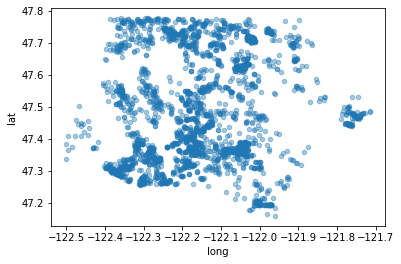

In [50]:
import matplotlib.pyplot as plt
df_clean.plot(kind="scatter", x="long", y="lat", alpha=0.4)
plt.show();

In [51]:
seattle_locations = Seattle_Homes[["lat", "long", "id"]]

In [52]:
notSeattle_locations = NotSeattle_Homes[["lat", "long", "id"]]

In [ ]:
#Create the Seattle map
#map = folium.Map(location=[seattle_locations.lat.mean(), 
#                           seattle_locations.long.mean()], zoom_start=14, control_scale=True)

#for index, location_info in seattle_locations.iterrows():
#    folium.Marker([location_info["lat"], location_info["long"]], popup=location_info["id"],icon=folium.Icon(color='orange',icon='none')).add_to(map)

#map

In [ ]:
#Create the non Seattle map
#map = folium.Map(location=[notSeattle_locations.lat.mean(), 
#                           notSeattle_locations.long.mean()], zoom_start=14, control_scale=True)

#for index, location_info in notSeattle_locations.iterrows():
#    folium.Marker([location_info["lat"], location_info["long"]], popup=location_info["id"],icon=folium.Icon(color='blue',icon='none')).add_to(map)
    
#map

In [121]:
#Create the non Seattle map
from folium.plugins import FastMarkerCluster

map = folium.Map(location=[notSeattle_locations.lat.mean(), 
                           notSeattle_locations.long.mean()], zoom_start=9, control_scale=True)

for index, location_info in notSeattle_locations.iterrows():
    folium.Marker([location_info["lat"], location_info["long"]], popup=location_info["id"],icon=folium.Icon(color='blue',icon='none')).add_to(map)

for index, location_info in seattle_locations.iterrows():
    folium.Marker([location_info["lat"], location_info["long"]], popup=location_info["id"],icon=folium.Icon(color='orange',icon='none')).add_to(map)
  
king_county = [
    [47.777799, -121.998473],
    [47.777799, -122.419374],
    [47.734022, -122.419374],
    [47.503347, -122.419374],
    [47.503347, -122.419374],
    [47.503347, -122.533756],
    [47.324233, -122.533756],
    [47.324233, -122.419374],
    [47.257529, -122.419374],
    [47.257529, -122.249917],
    [47.161605, -121.924595],
    [47.161605, -121.404507],
    [47.373455, -121.404507],
    [47.600453, -121.131500],
    [47.777799, -121.131500],
    [47.777799, -121.998473],
]

# Plot lines using coordinates
my_PolyLine=folium.PolyLine(locations=king_county,weight=3, color = 'black')
map.add_child(my_PolyLine)


map

In [55]:
data_relevant = df_clean.copy()

In [ ]:
data_relevant = data_relevant.drop(columns=['id', 'date', 'waterfront', 'greenbelt', 'nuisance', 'view',
                                  'condition', 'grade', 'heat_source', 'sewer_system','sqft_above','sqft_basement',
                                  'yr_renovated', 'address', 'lat', 'long'])

data_relevant.head()

### Export this cleaned dataset with only relevant columns as a .csv

In [ ]:
#data_relevant.to_csv('data_relevant.csv')